# <h1><center><b>Visualisation de données<b></center></h1>

## <h2>1. Importation des modules</h2>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from joblib import Parallel, delayed
from sklearn.decomposition import PCA


## <h2>2. Préparation d'affichage du dataset </h2>

In [57]:
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_column", 170)
pd.set_option("display.max_colwidth", 100)
pd.set_option('display.max_info_columns', 170)

## <h2>3. Affichage du dataset</h2>

In [58]:
df = pd.read_csv("Dataset/df_nettoye.csv", sep=",", low_memory=False)

## 4. Analyse uni/bi variés

In [101]:
df.rename(columns={'carbohydrates_100g': 'glucides_100g'}, inplace=True)

print(df.columns)

Index(['code', 'url', 'product_name', 'categories_fr', 'additives_n',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'cholesterol_100g', 'glucides_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'categories_filtered'],
      dtype='object')


On renomme la colonne glucide pour une meilleur compréhension 

In [102]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,glucides_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000,100911.00000,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000,100911.000000
mean,1.665210,1180.083259,14.916569,5.179153,0.012212,31.688830,16.199218,2.46244,5.878443,1.010492,0.000084,0.005239,0.036602,0.001398,7.505911
std,2.371614,811.586318,18.015289,7.014520,0.035729,26.344278,19.003765,3.49582,6.918818,1.643561,0.000475,0.016564,0.048368,0.001739,9.333205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,0.000000,431.000000,0.880000,0.141360,0.000000,8.400000,1.800000,0.00000,0.500000,0.071120,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1096.000000,8.900000,2.080000,0.000000,23.330000,8.200000,1.40000,4.000000,0.550000,0.000000,0.000000,0.008000,0.000800,4.000000
75%,2.000000,1868.000000,23.100000,7.580000,0.008000,54.900000,26.000000,3.40000,7.890000,1.303020,0.000061,0.003000,0.067000,0.002400,15.000000
max,29.000000,3000.000000,100.000000,50.000000,1.250000,100.000000,90.000000,46.70000,94.700000,19.800000,0.050700,0.245000,0.250000,0.015000,28.000000


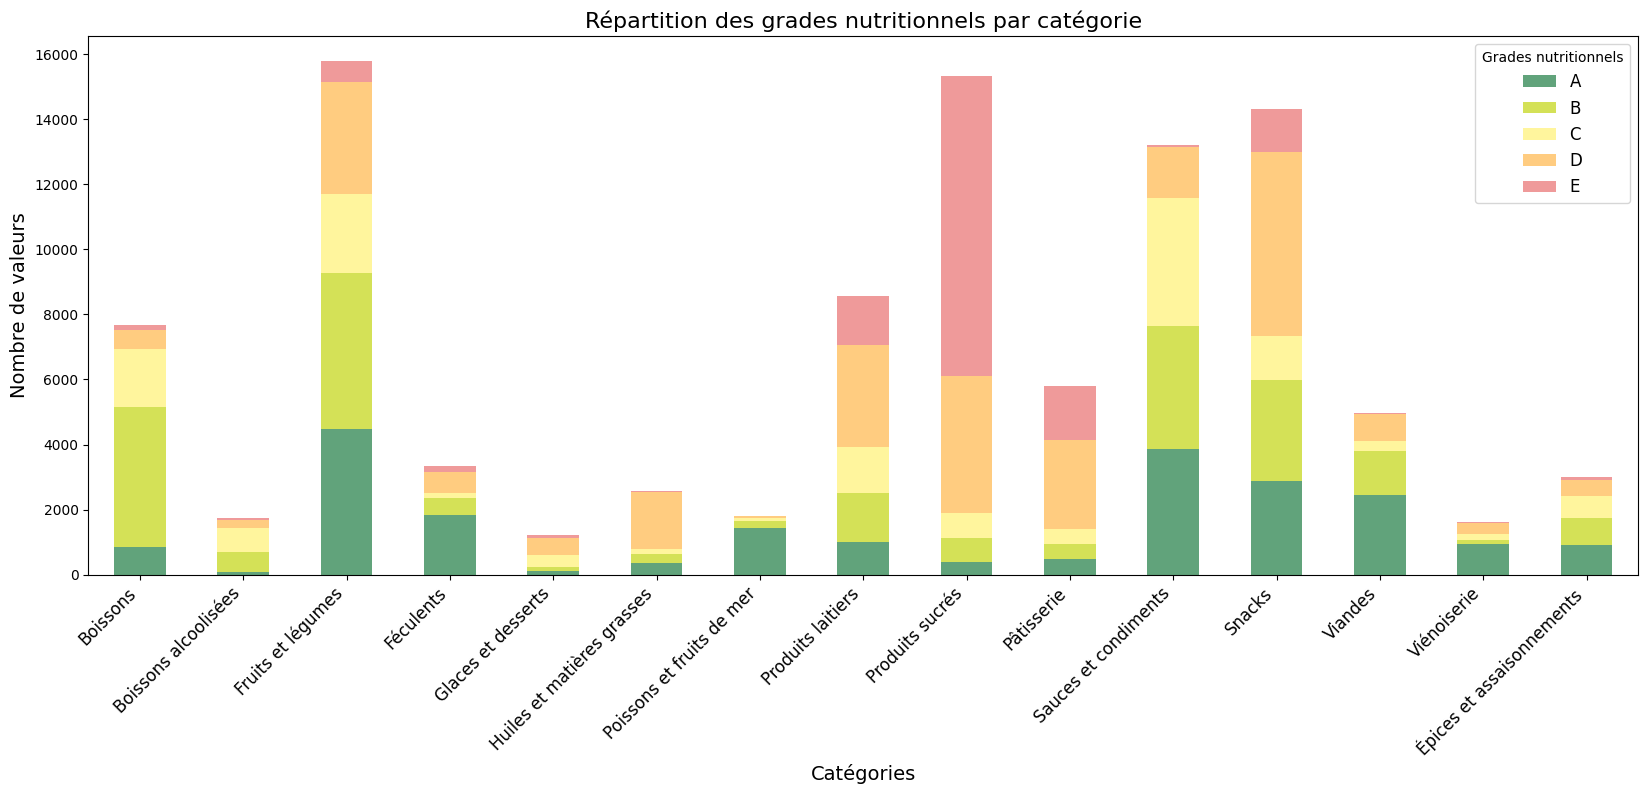

In [103]:
stacked_counts = df.groupby(['categories_fr', 'nutrition_grade_fr']).size().unstack(fill_value=0)
stacked_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(20, 7), 
    color=["#61a37b", "#D4E157", "#FFF59D", "#FFCC80", "#EF9A9A"]
)

plt.title('Répartition des grades nutritionnels par catégorie', fontsize=16)
plt.xlabel('Catégories', fontsize=14)
plt.ylabel('Nombre de valeurs', fontsize=14)
plt.legend(title='Grades nutritionnels', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

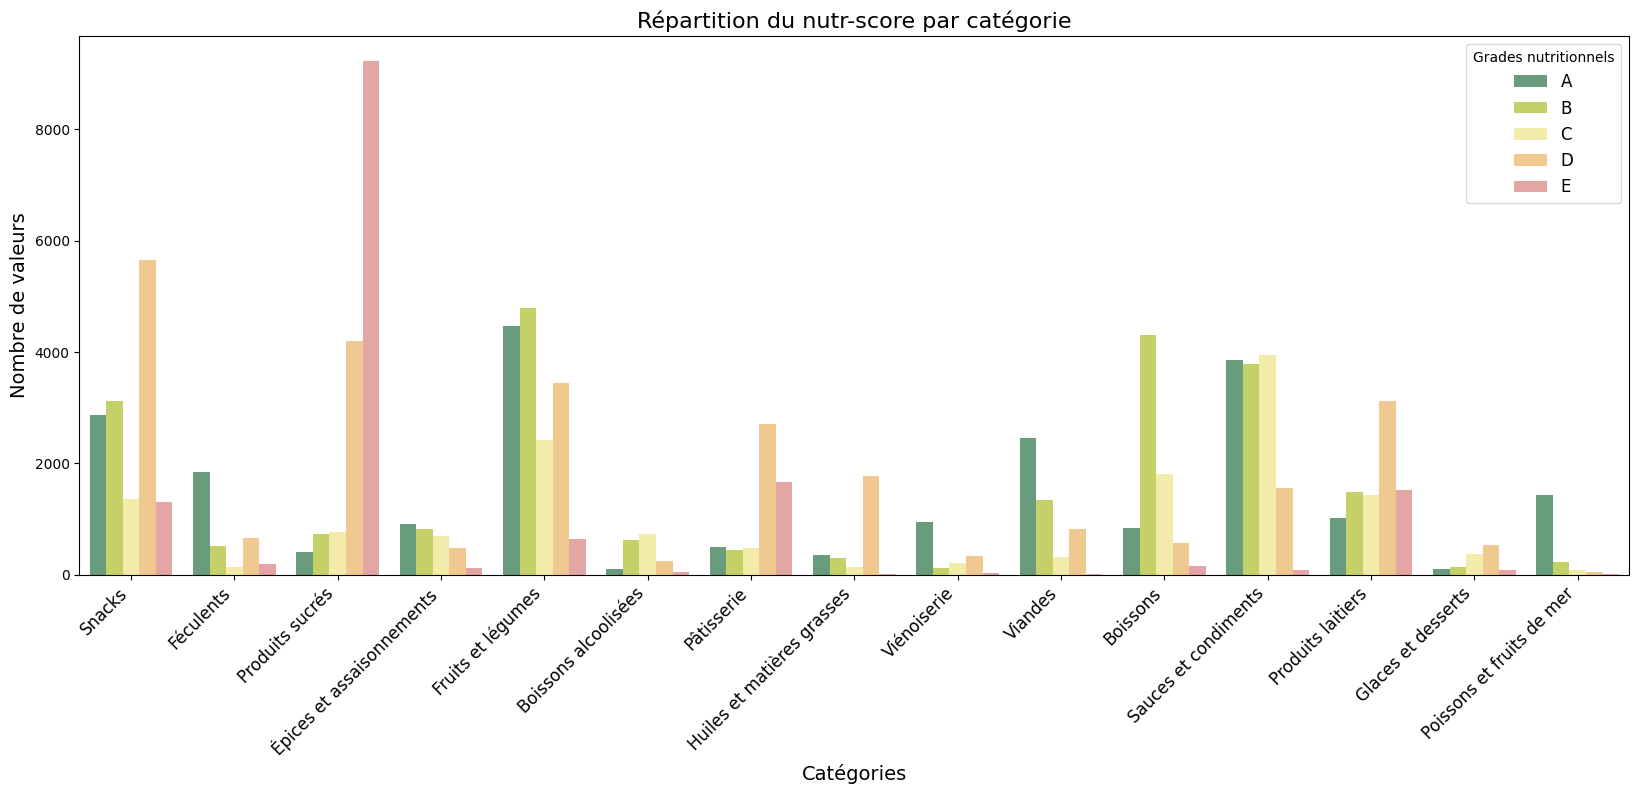

In [104]:
grade_order = ['A', 'B', 'C', 'D', 'E']

plt.figure(figsize=(20, 7))
sns.countplot(
    data=df, 
    x='categories_fr', 
    hue='nutrition_grade_fr', 
    palette=["#61a37b", "#D4E157", "#FFF59D", "#FFCC80", "#EF9A9A"], 
    hue_order=grade_order
)
plt.title('Répartition du nutr-score par catégorie', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Catégories', fontsize=14)
plt.ylabel('Nombre de valeurs', fontsize=14)
plt.legend(title='Grades nutritionnels', fontsize=12)
plt.show()

On réalise 2 types de visualisations différents, on a un diagramme à barre empilé et un diagramme à barre groupé. 2 types de visualisations montrant la répartition du Nutri-Score en fonction de la catégorie 
<br>On remarque que chez les produits sucrés, il y a une grande quantité de produits avec un Nutri-Score E et par exemple les poissons et fruits de mer une majorité de produit avec un Nutri-Score A
<br>Cela est dû au sucre qui influe sur la valeur du Nutri-Score.

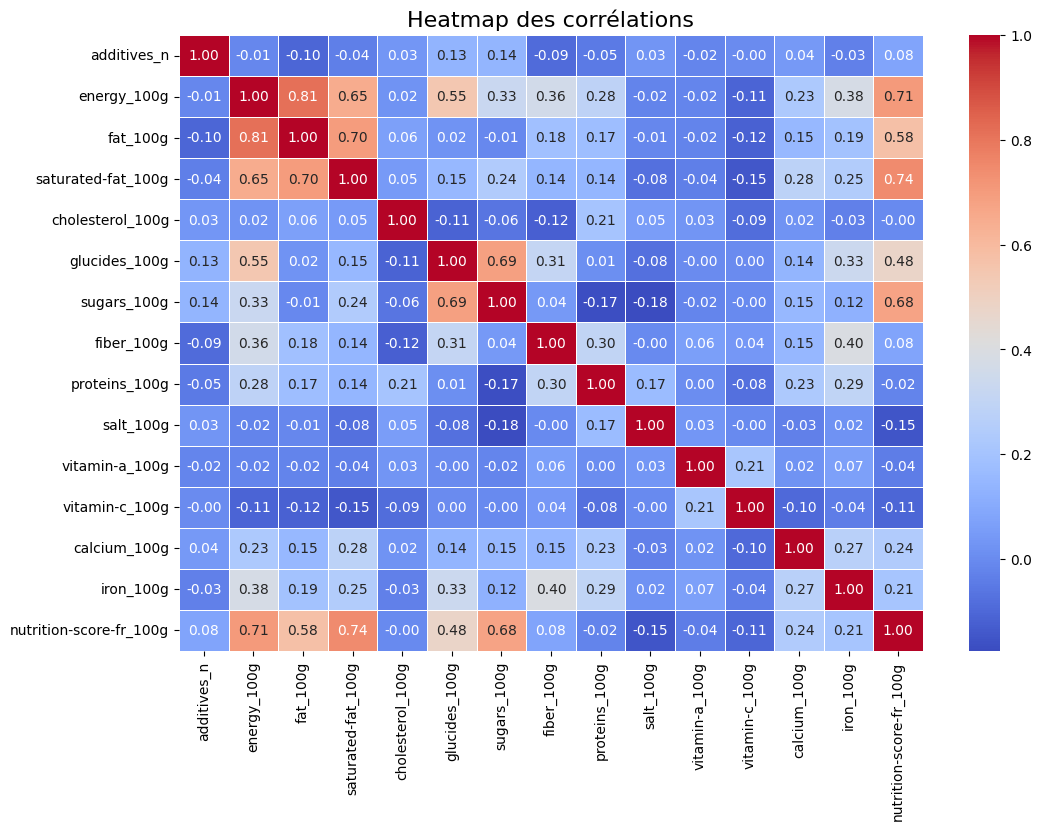

In [105]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)
plt.title('Heatmap des corrélations', fontsize=16)
plt.show()

Le diagramme de chaleur permet de visualiser une corrélation entre les colonnes. 
<br>On remarque des corrélations entre la graisse, les graisses saturés et l'énergie et une corrélation entre le sucre et le carbohydrate.
<br>Par rapport au Nutri-Score, il y a une corrélation avec l'énergie la graisse (et graisse saturée) et le sucre (et les glucides).
<br>
<br>Étant donné que l'énergie, la graisse et la graisse saturée sont corrélés, on peut supposer qu'il y a une ou 2 de ces valeurs qui influe les autres, mais aussi le Nutri-Score. On remarque qu'il y a une corrélation à 75 %, 71 % et 67 % avec la graisse saturés, l'énergie et le sucre.
<br>
<br>On sait que dans le calcul du Nutri-Score, on prend en compte la graisses saturés l'energie et le sucre.
<br>Dans le diagramme, on a une valeur positive qui montre une corrélation entre 2 colonnes, cela montre que lorsqu'elle augmente l'autre colonne augmente aussi.

Étant donné que la consommation excessive de graisses saturées et de sucre est nuisible à la santé, le Nutri-Score nous indique que ce produit n'est pas bon pour nous.
<br>Cependant, la matrice de corrélations révèle une autre réalité : les additifs n'influencent pas le Nutri-Score, alors qu'ils ne contribuent en rien aux valeurs nutritionnelles et ne servent qu'à améliorer la conservation ou l’aspect visuel (plus attrayant ou pour masquer des défauts) <font color='red'>tout en étant possiblement dangereux pour la santé.

C:\Users\Hoa\AppData\Local\Temp\ipykernel_13836\2640490956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


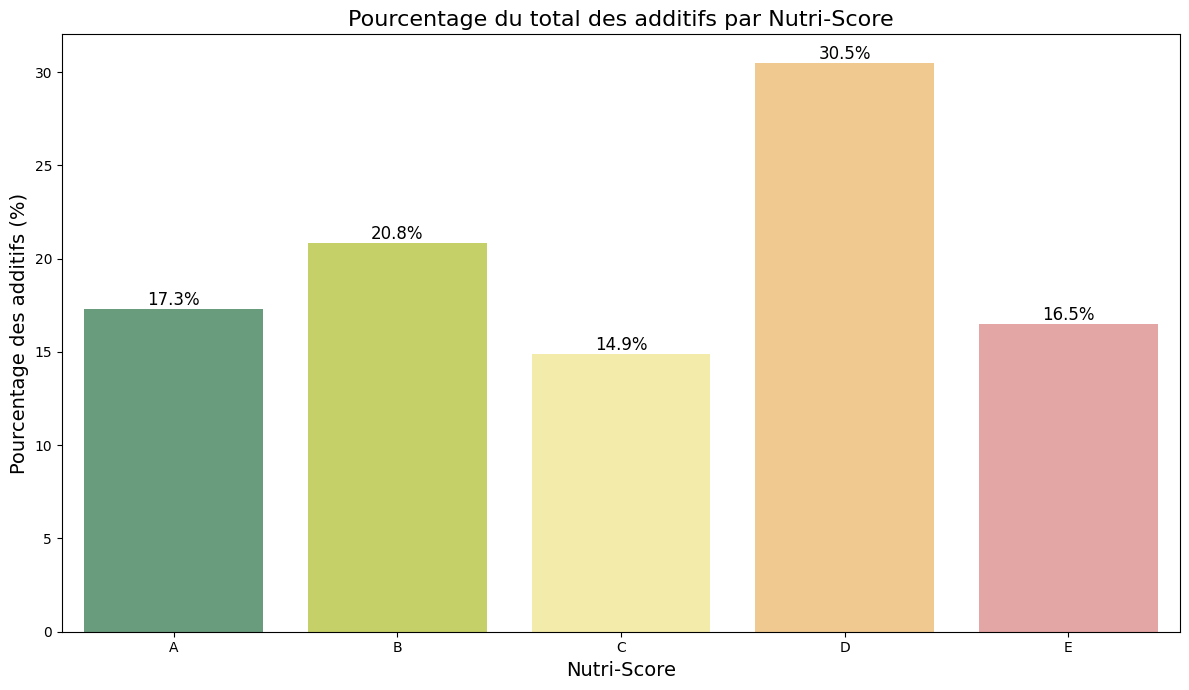

In [106]:
df_percent = df.groupby('nutrition_grade_fr')['additives_n'].sum()
df_percent = (df_percent / df_percent.sum()) * 100 

plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x=df_percent.index, 
    y=df_percent.values, 
    palette=["#61a37b", "#D4E157", "#FFF59D", "#FFCC80", "#EF9A9A"],  
)

for i, value in enumerate(df_percent.values):
    plt.text(i, value , f'{value:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Pourcentage du total des additifs par Nutri-Score', fontsize=16)
plt.xlabel('Nutri-Score', fontsize=14)
plt.ylabel('Pourcentage des additifs (%)', fontsize=14)
plt.tight_layout()
plt.show()

Cette visualisation nous montre clairement et appuie sur le fait que le nombre d'additif n'inffluence pas le Nutri-Score
<br>Je rappelle que tout les additifs ne sont pas nocifs pour la santé 

<b>On pourrait conclure sur le fait que le Nutri-Score nous permet de nous donner un ordre d'idées sur l'impact (positif/négatif) qu'il aura sur notre corps mais le soucis c'est qu'il prend pas tout en compte et permet de comparer 2 produits qu'avec leurs valeurs nutritionnelle et ne prends pas en compte d'autres facteur comme la qualités, la présence de pesticides ou comme on a dit de'additifs qui pourrait nuire à notre santé

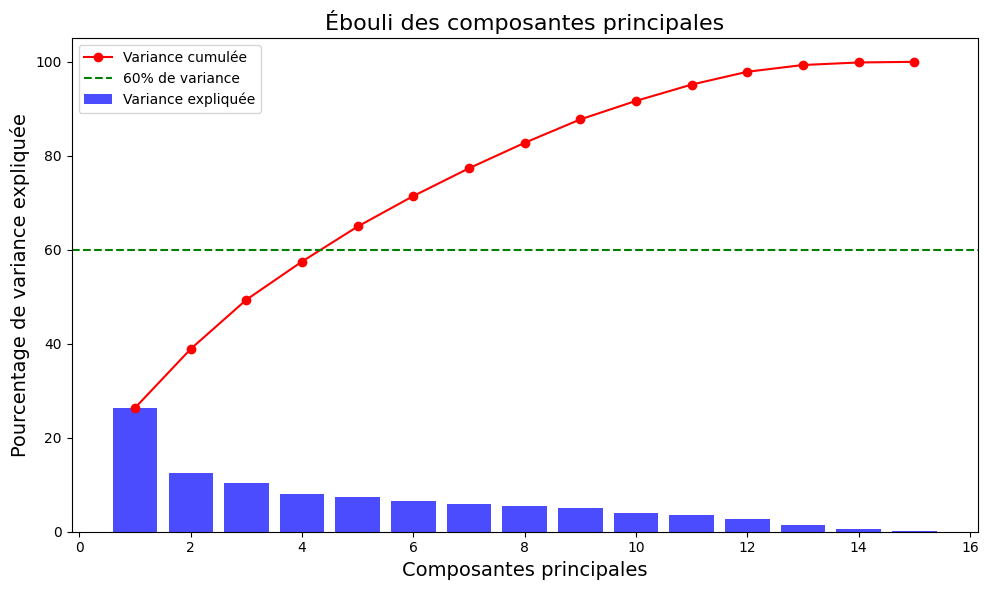

In [107]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
features = numeric_columns.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_columns)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
explained_variance = pca.explained_variance_ratio_ * 100
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label='Variance expliquée')
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='r', label='Variance cumulée')
plt.axhline(y=60, color='g', linestyle='--', label='60% de variance')
plt.title("Ébouli des composantes principales", fontsize=16)
plt.xlabel("Composantes principales", fontsize=14)
plt.ylabel("Pourcentage de variance expliquée", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()




L'eboulis nous montre que pour avoir 60% de variances il nous faut les 4 composantes

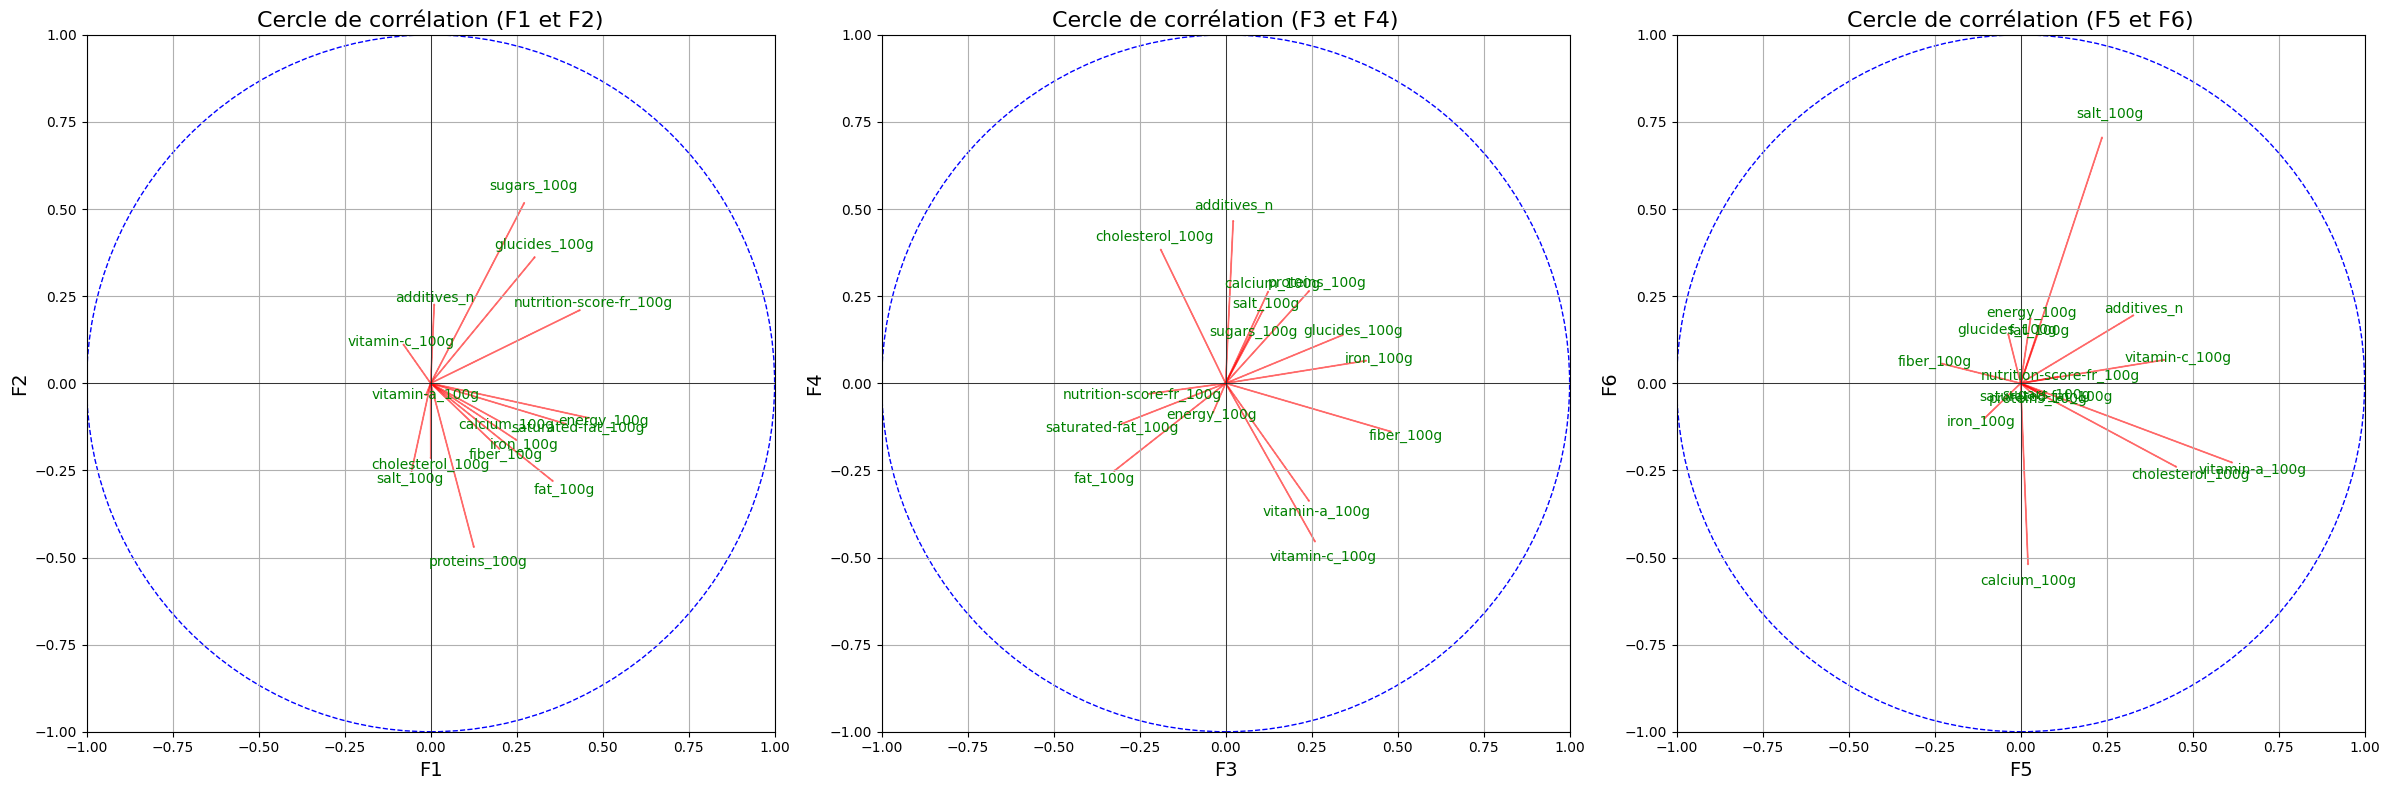

In [108]:
# 2. Cercle de corrélation
def plot_correlation_circle(pca, components, features, ax, xlabel, ylabel, title):
    for i, feature in enumerate(features):
        ax.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        ax.text(components[i, 0] * 1.1, components[i, 1] * 1.1, feature, color='g', ha='center', va='center')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
    ax.add_artist(circle)

# Extraction des composantes principales
components = pca.components_.T

# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Cercle de corrélation pour F1 et F2
plot_correlation_circle(
    pca, components[:, :2], features, axes[0], 
    xlabel="F1", ylabel="F2", title="Cercle de corrélation (F1 et F2)"
)

# Cercle de corrélation pour F3 et F4
plot_correlation_circle(
    pca, components[:, 2:4], features, axes[1], 
    xlabel="F3", ylabel="F4", title="Cercle de corrélation (F3 et F4)"
)

# Cercle de corrélation pour F5 et F6
plot_correlation_circle(
    pca, components[:, 4:6], features, axes[2], 
    xlabel="F5", ylabel="F6", title="Cercle de corrélation (F5 et F6)"
)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

<h4>Comprendre les relations entre les variables :</h4>

<li>Les flèches représentent les variables initiales projetées dans l'espace des deux premières composantes principales.
<li>La direction et la longueur des flèches indiquent la contribution des variables aux composantes principales.
<li>Une flèche proche du bord du cercle signifie que la variable est bien représentée dans cet espace.
<br>
<h4>Identifier les corrélations :</h4>

<li>Si deux flèches sont proches l'une de l'autre, cela indique une forte corrélation positive entre les deux variables.
<li>Si deux flèches sont opposées (angle de 180°), cela indique une corrélation négative.
<li>Si deux flèches forment un angle de 90°, cela signifie qu'elles sont indépendantes.

<h4>Ce qu'on voit</h4>
<li>Dans chacun des cercles on remarque qu'il y a une corrélation entre les glucides et le sucre qui sont dans les 3 cercles assez proche meme chose pour la graisse, graisses saturés et energy
<

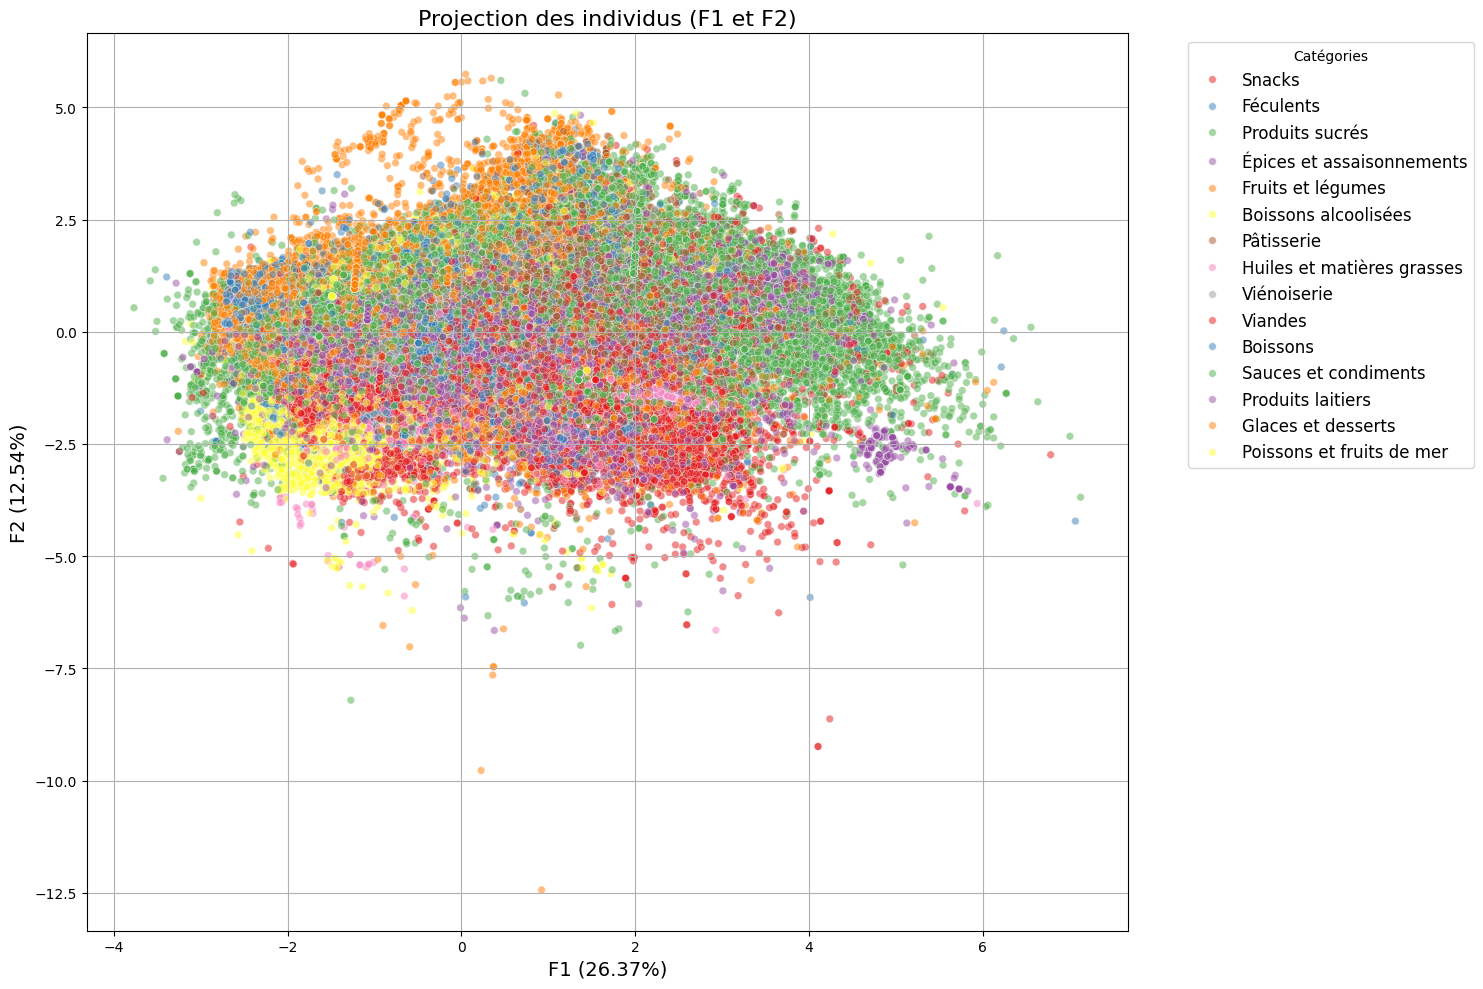

In [ ]:
# Filtrer les catégories principales
top_categories = df['categories_fr'].value_counts().nlargest(10).index  
df['categories_filtered'] = df['categories_fr'].apply(lambda x: x if x in top_categories else 'Autres')

# Tracer le scatterplot avec les catégories filtrées
categories = df['categories_fr']
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=categories, 
    palette="Set1", 
    alpha=0.5,
    s=30,  
)
plt.title("Projection des individus (F1 et F2)", fontsize=16)
plt.xlabel("F1 (%.2f%%)" % explained_variance[0], fontsize=14)
plt.ylabel("F2 (%.2f%%)" % explained_variance[1], fontsize=14)
plt.legend(title="Catégories", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')  # Déplacer la légende
plt.grid()
plt.tight_layout()
plt.show()

On remarque qu'il y a certain groupe quisont un peu trop étalé comme les produits laitiers mais d'autrecomme les poisson et fruits de mer bien groupés.